In [12]:
import numpy as np
import matplotlib.pyplot as plt

1. Дана модель вида:
### $a(x, w) = w_{0} + w_{1}*x + w_{2}*x^2 + w_{3}*x^3$

Необходимо найти коэффициенты w.

In [2]:
np.random.seed(0)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1

loss = lambda ax, y: (ax - y) ** 2
model_a = lambda xx, ww: (ww[0] + ww[1] * xx + ww[2] * xx ** 2 + ww[3] * xx ** 3) # модель

Y = np.sin(x * 5) + 2 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

X = np.array([[1, xx, xx**2, xx**3] for xx in x]) # обучающая выборка для поиска коэффициентов w модели a

w = np.dot((np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)), Y)

Для решения использовалась квадратическая функция потерь: 
### $loss(a, y_{i}) = (a(x_{i}) - y_{i})^2$

Функционал качества (средний эмпирический риск): 
### $Q(a, X) = \frac{1}{n} * (X*w - Y)^2$

Дифференцируем выражение по вектору w, получаем: 
### $\frac{\partial Q(a, X)}{\partial w} = \frac{2}{n} * X^T * (X*w - Y) = 0$

получаем: 
### $w = (X^T * X)^{-1}*X^T*Y$

2. Задача бинарной классификации. Необходимо найти коэффициенты w.

In [19]:
data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

X = np.array([[1, *xx] for xx in data_x])
y = np.array(data_y)

xy = np.sum([x * y for x, y in zip(X, y)], axis=0)
xx = np.linalg.inv(np.sum([np.outer(x, x) for x in X], axis=0))
w = np.dot(xy, xx)

Решение:

Используя квадратическую функцию потерь: 
### $(1 - w^T * x_{i}*y_{i})^2$, 

при таком функционале качества: 
### $\sum^n_{i=1} (1 - w^T * x_{i}*y_{i})^2$,

находим вектор параметров w по формуле: 
### $w = \sum^n_{i=1} (x^T_{i} * y_{i}) * (\sum^n_{i=1} x_{i} * x^T_{i})^{-1}$

Визуализируем данные и построим разделяющую линию:

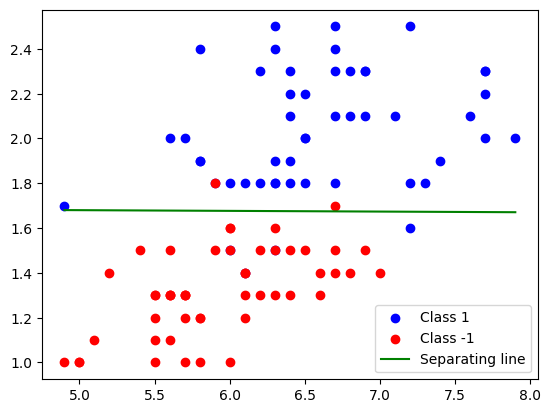

In [21]:
x_0 = X[y == 1][:, 1:]
x_1 = X[y == -1][:, 1:]

x_min, x_max = np.min(X[:, 1]), np.max(X[:, 1])
x_range = np.linspace(x_min, x_max, 100)
y_range = -x_range * w[1] / w[2] - w[0] / w[2]

plt.figure()
plt.scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 1')
plt.scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class -1')
plt.plot(x_range, y_range, color='green', label='Separating line')
plt.legend()
plt.show()